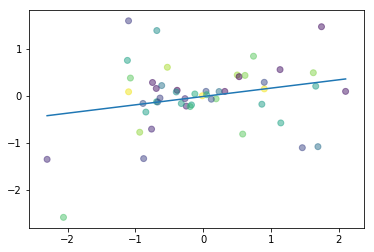

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creates 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

# Makes the dots colorful
colors = np.random.rand(n)

# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [2]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [4]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [5]:
y_values = [2*i + 1 for i in x_values]

In [6]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [7]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 

In [8]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [9]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [10]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [11]:
import torch
import torch.nn as nn

In [12]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [14]:
criterion = nn.MSELoss()

In [15]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
epochs = 100

In [17]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 300.4488220214844
epoch 2, loss 24.708349227905273
epoch 3, loss 2.214810609817505
epoch 4, loss 0.3778553903102875
epoch 5, loss 0.22581888735294342
epoch 6, loss 0.2112402617931366
epoch 7, loss 0.20789799094200134
epoch 8, loss 0.20549605786800385
epoch 9, loss 0.2031947374343872
epoch 10, loss 0.20092542469501495
epoch 11, loss 0.19868148863315582
epoch 12, loss 0.1964627504348755
epoch 13, loss 0.1942690908908844
epoch 14, loss 0.19209954142570496
epoch 15, loss 0.18995456397533417
epoch 16, loss 0.18783308565616608
epoch 17, loss 0.18573564291000366
epoch 18, loss 0.18366171419620514
epoch 19, loss 0.18161062896251678
epoch 20, loss 0.17958283424377441
epoch 21, loss 0.17757736146450043
epoch 22, loss 0.175594300031662
epoch 23, loss 0.1736336350440979
epoch 24, loss 0.1716945469379425
epoch 25, loss 0.1697774976491928
epoch 26, loss 0.16788138449192047
epoch 27, loss 0.16600669920444489
epoch 28, loss 0.16415300965309143
epoch 29, loss 0.16231997311115265
epoch 30,

In [18]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.49694738],
       [ 2.5693915 ],
       [ 4.6418357 ],
       [ 6.71428   ],
       [ 8.786724  ],
       [10.859168  ],
       [12.931613  ],
       [15.004057  ],
       [17.076502  ],
       [19.148947  ],
       [21.22139   ]], dtype=float32)